# BIOMEDICAL IMAGE ANALYSIS IN PYTHON
[datacamp.com](https://campus.datacamp.com/courses/biomedical-image-analysis-in-python/)



# CHAPTER 1: EXPLORATION #

Prepare to conquer the Nth dimension! To begin the course, you'll learn how to load, build and navigate N-dimensional images using a CT image of the human chest. You'll also leverage the useful ImageIO package and hone your NumPy and matplotlib skills.




## IMAGE DATA

In [1]:
# Project Folder:
%cd /content/drive/MyDrive/Biomedical_Image_Processing_Datacamp

/content/drive/MyDrive/Biomedical_Image_Processing_Datacamp


### Biomedical imaging: more than a century of discovery

Since the first x-ray in 1895, medical imaging technology has advanced clinical care and opened up new fields of scientific investigation. The amount of imaging data is exploding: by 2020, there is estimated to be more than three and a half billion terabytes of it in the U.S. alone. This has created amazing opportunities for analysis: measuring organ shape and size; creating detailed reconstructions of anatomy; analyzing tissue composition; predicting pathology, and so much more. The complexity and variety of the data can make it an intimidating field to jump into.



### Course objectives
Fortunately, there are fantastic tools and a wealth of resources to support you. In this course, we'll focus on several principles underlying biomedical image analysis. You'll learn how to explore multidimensional arrays, emphasize important features using masks and filters, extract specific measurements from objects, and compare multiple images or patients. While this only scratches the surface of the field, it will give you a firm foundation for advanced concepts like classification and segmentation. Throughout, we'll rely on packages in Python's core scientific computing ecosystem: ImageIO, NumPy, SciPy, and matplotlib. Let's dive in.

### Loading Images

To warm up, let's load and plot a single image. We can read in images using the ImageIO package. Its imread() function will take a single file and load it as an image object. One useful feature of ImageIO is that it can read DICOM files, the standard format for human medical imaging. The data is read in as an image object, which is a type of NumPy array.

To access specific values from your image, you can slice out a single value or a range of index values along each dimension.

In this chapter, we'll work with sections of a computed tomography (CT) scan [link text](https://en.wikipedia.org/wiki/CT_scan) from [The Cancer Imaging Archive](http://www.cancerimagingarchive.net/about-the-cancer-imaging-archive-tcia/). CT uses a rotating X-ray tube to create a 3D image of the target area.

The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.

To warm up, use the imageio package to load a single DICOM image from the scan volume and check out a few of its attributes.

#### Exercise: Load images

```
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imageio.imread('chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)
Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)
```



In [ ]:
import imageio

In [ ]:
!curl -OL https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm
!ls -l dicom_00000001_000.dcm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   164    0   164    0     0    550      0 --:--:-- --:--:-- --:--:--   548
100 1024k  100 1024k    0     0   743k      0  0:00:01  0:00:01 --:--:-- 15.8M
-rw------- 1 root root 1049332 Feb  6 16:30 dicom_00000001_000.dcm


In [ ]:
!pip install tensorflow-io

     |████████████████████████████████| 25.3MB 1.6MB/s 


### Decode DICOM image

Reference: ["Decode DICOM files for medical imaging" Colab Notebook](https://colab.research.google.com/github/tensorflow/io/blob/master/docs/tutorials/dicom.ipynb#scrollTo=qFdPvlXBOdUN)  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

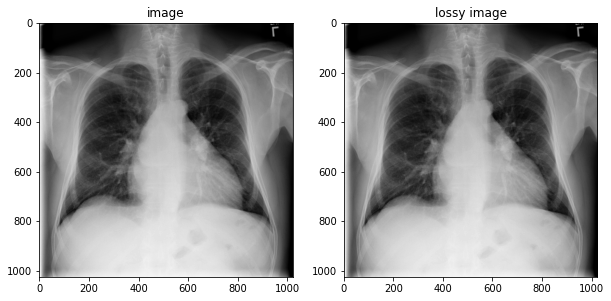

In [ ]:
import tensorflow_io as tfio

image_bytes = tf.io.read_file('dicom_00000001_000.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

In [ ]:
im = imageio.imread('dicom_00000001_000.dcm')

In [ ]:
# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (1024, 1024)


### Metadata ##

Images are always acquired in a specific context. This information is often referred to as metadata. ImageIO loads available metadata into a dictionary, accessible through the meta attribute. This is especially important for DICOM files, which contain a lot of patient and acquisition information. Since meta is a Python dictionary, you can access specific information by indexing it with one of the available keys. This file, for example, includes a modality field. You can also call the keys method to list all of the available metadata.

ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

*   Patient demographics: name, age, sex, clinical information
*   Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)

Start this exercise by reading in the chest image and listing the available fields in the meta dictionary.

#### Exercise

In [ ]:
#Print available metadata fields:
print(im.meta.keys())

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'Modality', 'StudyDescription', 'PatientID', 'PatientSex', 'PatientAge', 'StudyInstanceUID', 'SeriesInstanceUID', 'SamplesPerPixel', 'Rows', 'Columns', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'PixelData', 'shape', 'sampling'])


In [ ]:
print(im.meta['sampling'])

(1.0, 1.0)


In [ ]:
print(im.meta['PatientSex'])

M 


In [ ]:
print(im.meta['StudyDescription'])

Cardiomegaly


In [ ]:
print(im.meta['PatientAge'])

58


### Plotting images
Visualization is fundamental to image analysis, and we'll rely heavily on matplotlib and its imshow() function throughout this course. To draw a simple plot of a 2D image, first, import the PyPlot module from matplotlib. Next, call pyplot dot imshow() and pass in the 2D image. If the image does not have color, add "cmap equals gray" to plot it in grayscale. Next, to reduce clutter, it's common to turn off the axis ticks, labels, and frame with pyplot dot axis off. Finally, call show() to render the image.

####Exercise

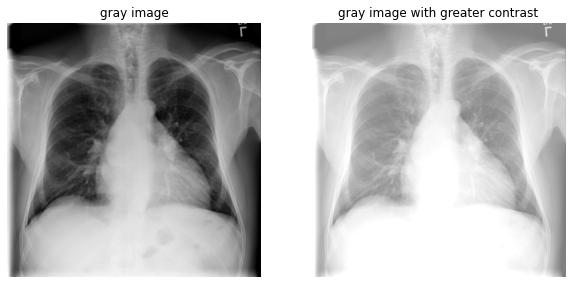

In [ ]:
# Import ImageIO and PyPlot 
import imageio
import matplotlib.pyplot as plt

im = imageio.imread('dicom_00000001_000.dcm')

fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('gray image')
axes[1].imshow(im, cmap='gray', vmin=-200, vmax=200)
axes[1].set_title('gray image with greater contrast')

for ax in axes:
  ax.axis('off')
  
plt.show()

## N-DIMENSIONAL IMAGES
Now that you can load and plot two-dimensional images let's discuss higher dimensional datasets.

### Images of all shapes and sizes
Images come in all shapes and sizes. This makes them versatile, but also complex. A standard grayscale image is the simplest type: it's an array that can be indexed by rows and columns.

3D images cover a volume of space rather than just a single plane. This volumetric data is useful because it can better capture the complexities of the human body, but it can be difficult to visualize because it can't be summarized in a single plot.

Color images are also three dimensional. RGB images, for example, have three color channels that, when rendered by matplotlib or other image viewers, express a wide range of colors.

Movies, or time series data, include a temporal dimension, showing how each element changes over time. Like the planar dimension for 3D volumes, the temporal dimension is put first by convention.

### N-dimensional images are stacks of arrays
Just as a 2D image is a stack of 1-dimensional vectors, 3D, 4D and even higher-dimensional images can be thought of as stacks of simpler ones. Let's illustrate this by creating a 3D volume from a few 2D images. First, we'll load ImageIO and NumPy. Then, we'll read in three slices of a chest CT scan. Each of these slices is an array with 512-row elements by 512 column elements. Now, we can feed a list of these three images into NumPy's stack() function to create a 3D volume. If we look at our new "vol" array, we see that it contains a third dimension with three elements along it, but the row and column dimensions are the same as before.

Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.

In this exercise, we will use NumPy's stack() function to combine several 2D arrays into a 3D volume. By convention, volumetric data should be stacked along the first dimension: **vol[plane, row, col]**.

Note: performing any operations on an ImageIO Image object will convert it to a numpy.ndarray, stripping its metadata.

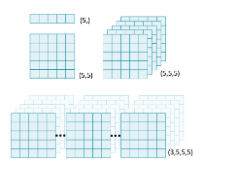

In [ ]:
from IPython.display import Image 
Image("./Images/stacked_images.png")

#### Exercise

In [ ]:
# Stacking multiple images

# Import ImageIO and NumPy
import imageio
import numpy as np

# Read in each 2D image

im1 = imageio.imread('./Data/ID00007637202177411956430/1.dcm')
im2 = imageio.imread('./Data/ID00007637202177411956430/10.dcm')
im3 = imageio.imread('./Data/ID00007637202177411956430/11.dcm')
print(im1.shape)

# Stack images into a volume
vol = np.stack([im1, im2, im3], axis=0)

print('Volume dimensions:', vol.shape)

(512, 512)
Volume dimensions: (3, 512, 512)


### Loading volumes directly
ImageIO's volread() function is capable of reading volumes directly from disk, whether your images are stored in their own folder, or if the dataset is already multi-dimensional. In this example, we have a folder named "chest data," which contains 50 slices of a 3D volume. We simply have to pass the folder name to volread(), and it will assemble the volume for us. Since these are DICOM images, the function actually checks the available metadata to make sure that the images are placed in the correct order. Otherwise, it will default to alphabetical order. Displaying the shape attribute shows us that we have 50 images stacked together.

####Exercise

In [ ]:
# Import ImageIO
import imageio

import os
os.listdir('./Data/ID00007637202177411956430')

['19.dcm',
 '21.dcm',
 '12.dcm',
 '11.dcm',
 '13.dcm',
 '10.dcm',
 '24.dcm',
 '1.dcm',
 '17.dcm',
 '20.dcm',
 '14.dcm',
 '22.dcm',
 '16.dcm',
 '23.dcm',
 '15.dcm',
 '18.dcm',
 '2.dcm',
 '8.dcm',
 '26.dcm',
 '27.dcm',
 '7.dcm',
 '28.dcm',
 '25.dcm',
 '9.dcm',
 '5.dcm',
 '30.dcm',
 '4.dcm',
 '29.dcm',
 '3.dcm',
 '6.dcm']

In [ ]:
# Load the directory of dcm images:
vol = imageio.volread('./Data/ID00007637202177411956430')

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

Reading DICOM (examining files): 1/30 files (3.3%)2/30 files (6.7%)3/30 files (10.0%)4/30 files (13.3%)6/30 files (20.0%)8/30 files (26.7%)10/30 files (33.3%)11/30 files (36.7%)12/30 files (40.0%)13/30 files (43.3%)14/30 files (46.7%)15/30 files (50.0%)16/30 files (53.3%)17/30 files (56.7%)18/30 files (60.0%)19/30 files (63.3%)20/30 files (66.7%)21/30 files (70.0%)22/30 files (73.3%)23/30 files (76.7%)24/30 files (80.0%)25/30 files (83.3%)26/30 files (86.7%)27/30 files (90.0%)28/30 files (93.3%)29/30 files (96.7%)

### Shape, sampling, and field of view
When analyzing images, keep in mind that the data is only a representation of real, physical space. The information in your images is limited to the number of elements in it. This is known as the array shape in NumPy and is always available as an attribute. The amount of space covered by each element is the sampling rate, and it can vary along each dimension. For DICOM images, the sampling rate is usually encoded in the metadata. For other types of image formats, such as JPEG and PNG, you may need to find it elsewhere. The field of view is the total amount of space covered along each axis. It is the product of the shape and sampling rate. Understanding the difference between these concepts is important, and we'll return to it throughout this course.

In [ ]:
# Image shape: number of elements along each axis
import imageio
vol = imageio.volread('./Data/ID00007637202177411956430')

# Image shape in voxels:
n0, n1, n2 = vol.shape
n0, n1, n2

Reading DICOM (examining files): 1/30 files (3.3%)30/30 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 24/30  (80.0%)30/30  (100.0%)


(30, 512, 512)

In [ ]:
# Sampling rate: physical space covered by each element
d0, d1, d2 = vol.meta['sampling']
d0, d1, d2

(10.0, 0.652344, 0.652344)

The amount of physical space covered by an image is its field of view, which is calculated from two properties:
Array shape, the number of data elements on each axis. Can be accessed with the shape attribute.
Sampling resolution, the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., meta['sampling']).
For this exercise, multiply the array shape and sampling resolution along each axis to calculate the field of view of vol. All values are in millimeters.

In [ ]:
# Field of view in mm
n0 * d0, n1 * d1, n2 * d2

(300.0, 334.000128, 334.000128)

## ADVANCED PLOTTING

Efficiently and comprehensively visualizing your data is key to successful image analysis.

### To plot N-dimensional data slice it! ##
Consider this loaf of bread - it’s a 3D volume that looks absolutely delicious. But what's inside the loaf? Is it bananas? Blueberries? Walnuts? This single 2D image cannot answer the question. Instead, you would have to slice it up and look at those pieces individually. The concept for 3D images is exactly the same: to explore your multidimensional array you must visualize many simpler slices of it.


### Plotting multiple images at once###
It's inefficient to plot each of these slices one by one. A better way is to display many at once. To do this, we'll leverage PyPlot's subplots() function, which creates a grid of axis objects based on the number of rows and columns you specify. When you call pyplot dot subplots(), it returns a figure object and an array of axis handles. In this case, the axes array has a shape of one by three. To draw images on each subplot, we will call the imshow() function directly from the axis object, rather than calling it through PyPlot. Here, we're plotting the first slice of vol with a gray colormap. After the first slice is drawn, repeat the process for the other slices. Finally, we can clean up and render the figure. Just like before, we want to turn off the ticks and labels by calling the axis() method. However, since we will do the same thing to each subplot, a for loop is more efficient than writing down each command. If you had many images to draw, you could insert the drawing step into a for loop as well. Finally, we render the image using pyplot dot show().



###Non-standard views
There are actually multiple ways you can slice a 3D volume into 2D images. The simplest way is to choose a frame along the first dimension and plot the second and third against each other.

If you instead selected a slice along the row dimension, you would get a second perspective. In this case, we are plotting head-to-toe versus left-to-right.

Finally, you could plot the first and second axes against each other, yielding a third view. When looking at human anatomy, these different views have special names: the axial, coronal, and sagittal planes. Knowing in which plane a dataset is stacked can help you navigate more efficiently.

### Modifying the aspect ratio
Many datasets do not have equal sampling rates across all dimensions. In these cases, you will want to stretch the pixels along one side to account for the differences. The amount of stretching needed is determined by the aspect ratio. Here we've decided to plot a slice with data from the first and second dimensions. To determine the aspect ratio, we first get the sampling rates along each dimension from the metadata dictionary. Then, we divide the sampling rate of the first dimension by the sampling rate of the second. When we call imshow(), we pass this ratio to the aspect argument.

This results in a properly proportioned image. Failing to adjust the aspect would have resulted in a distorted image.

#### Exercise: Generate subplots



You can draw multiple images in one figure to explore data quickly. Use plt.subplots() to generate an array of subplots.
To draw an image on a subplot, call the plotting method directly from the subplot object rather than through PyPlot: axes[0,0].imshow(im) rather than plt.imshow(im).

For this exercise, draw im1 and im2 on separate subplots within the same figure.

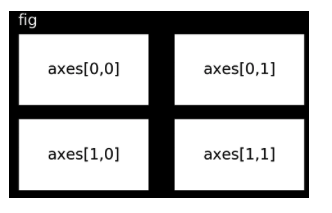

In [ ]:
Image("./Images/generate_subplots.png")

Reading DICOM (examining files): 1/30 files (3.3%)30/30 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 18/30  (60.0%)30/30  (100.0%)


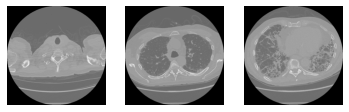

In [ ]:
import imageio
vol = imageio.volread('./Data/ID00007637202177411956430')
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].imshow(vol[0], cmap='gray')
axes[1].imshow(vol[10], cmap='gray')
axes[2].imshow(vol[20], cmap='gray')

for ax in axes:
  ax.axis('off')

plt.show()

#### Exercise: Slice 3D Images
The simplest way to plot 3D and 4D images by slicing them into many 2D frames. Plotting many slices sequentially can create a "fly-through" effect that helps you understand the image as a whole.
To select a 2D frame, pick a frame for the first axis and select all data from the remaining two: vol[0, :, :]

For this exercise, use for loop to plot every 40th slice of vol on a separate subplot. 

To select a 2D frame, pick a frame for the first axis and select all data from the remaining two: vol[0, :, :]
For this exercise, use for loop to plot every 10th slice of vol on a separate subplot.

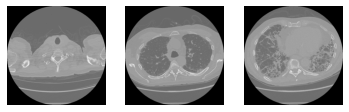

In [ ]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=3)

# Loop through subplots and draw image
for ii in range(3):
    im = vol[ii * 10, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
# Render the figure
plt.show()

#### Exercise: Plot other views
Any two dimensions of an array can form an image, and slicing along different axes can provide a useful perspective. However, unequal sampling rates can create distorted images.

Changing the aspect ratio can address this by increasing the width of one of the dimensions.

For this exercise, plot images that slice along the second and third dimensions of vol. Explicitly set the aspect ratio to generate undistorted images.


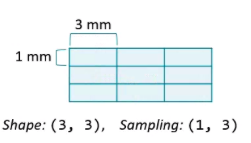

In [ ]:
Image("./Images/Plot_other_views.png")

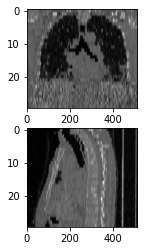

In [ ]:
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)

plt.show()

## REFERENCES:


*   [Datacamp course "BIOMEDICAL IMAGE ANALYSIS":](https://campus.datacamp.com/courses/biomedical-image-analysis-in-python/exploration?ex=3)
*   ["Decode DICOM files for medical imaging" Colab Notebook](https://colab.research.google.com/github/tensorflow/io/blob/master/docs/tutorials/dicom.ipynb#scrollTo=qFdPvlXBOdUN)  
*   [Imageio documentation](https://imageio.readthedocs.io/en/stable/examples.html)
